# Advertising: Predict Who Will Likely Click On The Ad
## _Data Science Project - [Kaggle](https://www.kaggle.com/fayomi/advertising)_


This project is divided in 6 sections:

1. Introduction

2. Exploring The Data

    2.1 The Data
    
3. Exploratory Data Analysis (EDA)

    3.1 Describing Features
    
    3.2 Descriptive Figures
    
        3.2.1 Distribution Plots
        
        3.2.2 Boxplots
        
        3.2.3 Cross-correlation Plot
        
        3.2.4 Distribution Plots With Respect To Our Target Feature
        
        3.2.5 Pair Plots With Respect To Our Target Feature
    
    3.3 Feature Engineering

        3.3.1 Skewed Features: Log Transform
        
        3.3.2 Removing Some Features
        
        3.3.3 Normalization Of Numerical Features
        
        3.3.4 Processing Categorical Feature: One Hot-Encoding

4. Model Selection

    4.1 Data Preparation: Training and Testing Sets

    4.2 Model Selection: Logistic Regression
    
        4.2.1 Logistic Regression
        
        4.2.2 Confusion Matrix, Precision, Recall, F1-Score
        
5. Model deployment


6. Actionable Recommendations

# 1. Introduction

The task is to predict who will most likely click on the ad. Let's consider that we are working for a marketing company. 

Let's assume that we have a marketing campaign for which we spend **1000USD per potential customer**. For each **customer that we target** with our ad campaign **and** that **clicks on the ad**, we get an **overall profit of 100USD**. However, if we target a **customer that ends up not clicking** on the ad, we incur a **net loss of 1050USD**. Therefore we can conclude that for each **customer that was not targeted** by the campaign **and** who **clicks on the ad**, we get an **overall profit of 1100USD**.

In [55]:
#Imporing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                        
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


# 2. Exploring the Data

## 2.1 The data:

There is one data set provided with this problem.

_**We will perform the exploratory data analysis on the whole set, before separating it into a training and test sets later before performing machine learning.**_

In [56]:
# Importing dataset
Advertising_Data= pd.read_csv("Advertising.csv")        
Advertising_Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


Let's look at the main characteristics of our dataset, such as the number of observations, the type of variables, the summary statistics for each variables, the number of missing data, etc.

In [57]:
Advertising_Data.info()     # Understanding Data and its datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
Daily Time Spent on Site    1018 non-null float64
Age                         1018 non-null int64
Area Income                 1018 non-null float64
Daily Internet Usage        1018 non-null float64
Ad Topic Line               1018 non-null object
City                        1018 non-null object
Male                        1018 non-null int64
Country                     1018 non-null object
Timestamp                   1018 non-null object
Clicked on Ad               1014 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 79.6+ KB


In [58]:
Advertising_Data.isnull().sum()                       

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               4
dtype: int64

Clicked on Ad has 4 missing values

In [59]:
Advertising_Data= Advertising_Data.dropna()  # Removing the records which has missing values

In [60]:
Advertising_Data.duplicated().sum()     # Checking for duplicates

7

In [61]:
Advertising_Data=Advertising_Data.drop_duplicates()  # Dropping duplicates

In [62]:
Advertising_Data.duplicated().sum() #verifying duplicates are removed

0

# 3. Exploratory Data Analysis (EDA)
## 3.1 Describing The Features

In [63]:
Advertising_Data['Clicked on Ad'].value_counts()/len(Advertising_Data)  # Both Clicked on Ad and not clicked on Ad are equally present 

1.0    0.502483
0.0    0.497517
Name: Clicked on Ad, dtype: float64

 Both Clicked on Ad and not clicked on Ad are equally present and its a well balanced dataset

In [64]:
Advertising_Data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,64.952403,36.958292,54899.398868,179.386514,0.482622,0.502483
std,15.850441,31.729539,13458.555374,44.548765,0.499946,0.500242
min,32.600000,-25.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.270000,29.000000,46899.780000,138.490000,0.000000,0.000000
50%,68.100000,35.000000,56984.090000,182.200000,0.000000,1.000000
75%,78.535000,42.000000,65350.775000,218.550000,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


By looking at the data , its not so skewed as the median and mean are almost similar.

Minimum value of age is negative and maximum value of age is abnormal

In [65]:
Advertising_Data['Age']=Advertising_Data['Age'].abs()    # Age cannot be negative and taking absolute of it


In [66]:
Advertising_Data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,64.952403,37.007944,54899.398868,179.386514,0.482622,0.502483
std,15.850441,31.671555,13458.555374,44.548765,0.499946,0.500242
min,32.600000,8.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.270000,29.000000,46899.780000,138.490000,0.000000,0.000000
50%,68.100000,35.000000,56984.090000,182.200000,0.000000,1.000000
75%,78.535000,42.000000,65350.775000,218.550000,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


In [67]:
Advertising_Data[Advertising_Data['Age']<18]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
823,43.16,8,25371.52,156.11,Implemented didactic support,Williamsport,1,Marshall Islands,2016-07-06 3:40,1.0


In [68]:
Advertising_Data[Advertising_Data['Age']>80]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
495,50.6,999,34191.13,129.88,Realigned reciprocal framework,New Daniellefort,1,United States of America,2016-05-03 12:57,1.0
604,57.2,103,57739.03,110.66,Innovative maximized groupware,East Heatherside,0,New Zealand,2016-03-19 11:09,1.0


For the Marketing campaign, our target Age group is above 18 years and below 80

In [69]:
# Removing the extreme age values
Advertising_Data=Advertising_Data[(Advertising_Data['Age']>18) & (Advertising_Data['Age']<80)] 

In [70]:
# Let's check out if the 'Daily TIme Spend on Site' is actually smaller or equal to the Daily Internet Usage'

Advertising_Data['delta'] = Advertising_Data['Daily Internet Usage'] - Advertising_Data['Daily Time Spent on Site']
sum(Advertising_Data['delta'] < 0)

3

In [71]:
Advertising_Data = Advertising_Data[Advertising_Data['delta'] >= 0]
Advertising_Data = Advertising_Data.drop('delta', axis=1)

## 3.2 Descriptive Figures
### 3.2.1 Distribution Plots

In [72]:
# Functions that we will use later on
def data_info(data):
    return data.info()

def creating_boxplots(size, target, features, data):
    plt.figure(figsize=size)
    for i in range(len(numerical_vars)):
        plt.subplot(5, 3, i+1)
        sns.boxplot(x=target, y=features[i], data=data )
        
def creating_distplot(size, data, features):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(5, 3, i+1)
        sns.distplot(data[features[i]])
        
def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, 
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
    print(corr)

In [73]:
categorical_vars = ["Ad Topic Line", "City", "Country"]
numerical_vars = ["Daily Time Spent on Site", "Area Income", "Daily Internet Usage", "Male", "Age"]
datetime_vars = "Timestamp"
target = "Clicked on Ad"

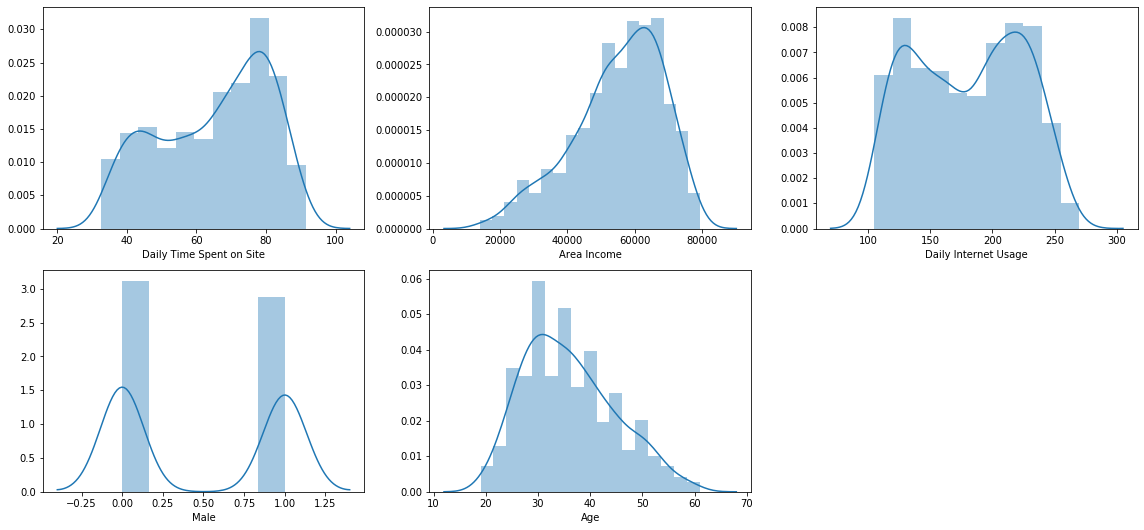

In [74]:
# Creating distribution plots
creating_distplot((16,18), Advertising_Data, numerical_vars)
plt.tight_layout()

From the overall distributions, we can observe interesting bimodal distributions for the "daily internet usage", and "daily time spent on site" which could suggest the presence of more than one group. Furthermore, the age and "area income" are little bit skewed which could potentially bias our model.

### 3.2.2 Boxplots

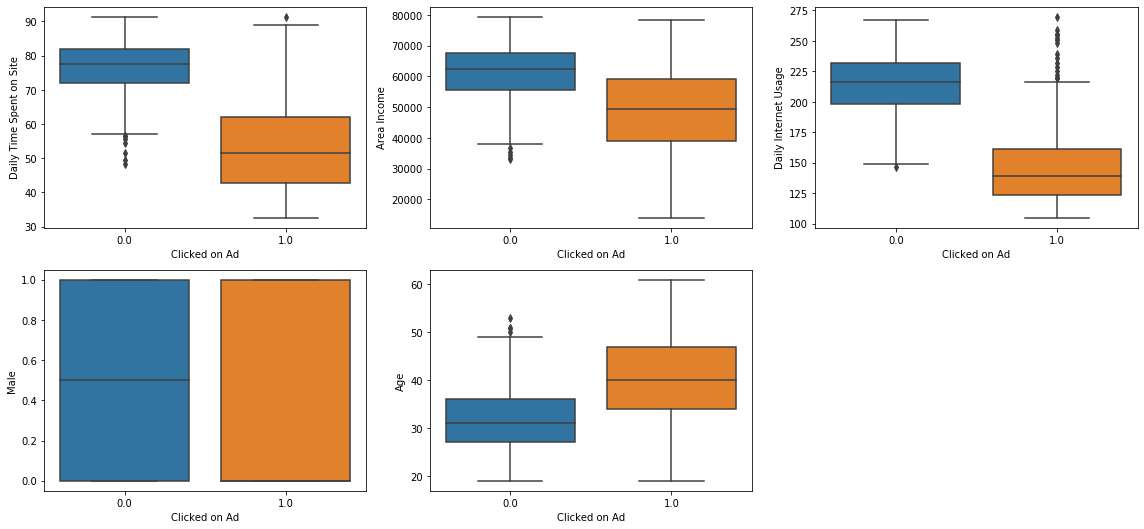

In [75]:
# Generating boxplots with respect to our target feature
creating_boxplots((16,18), target, numerical_vars, Advertising_Data)
plt.tight_layout()


Both boxplots on "Daily time spent on site" and "Daily internet usage" show a significant difference between the people who clicked on the ad vs. the people who did not. Also there is a potential trend between these two groups  with age and area income respectively. 

### 3.2.3 Cross-correlation Plot

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.330490     0.311206   
Age                                      -0.330490  1.000000    -0.181616   
Area Income                               0.311206 -0.181616     1.000000   
Daily Internet Usage                      0.518882 -0.365153     0.337957   
Male                                     -0.018394 -0.019814     0.001942   
Clicked on Ad                            -0.748189  0.490649    -0.476563   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518882 -0.018394      -0.748189  
Age                                  -0.365153 -0.019814       0.490649  
Area Income                           0.337957  0.001942      -0.476563  
Daily Internet Usage                  1.000000  0.029134      -0.786779  
Male                                  0.029134  1.000000      -0.038952  
Clicked on Ad   

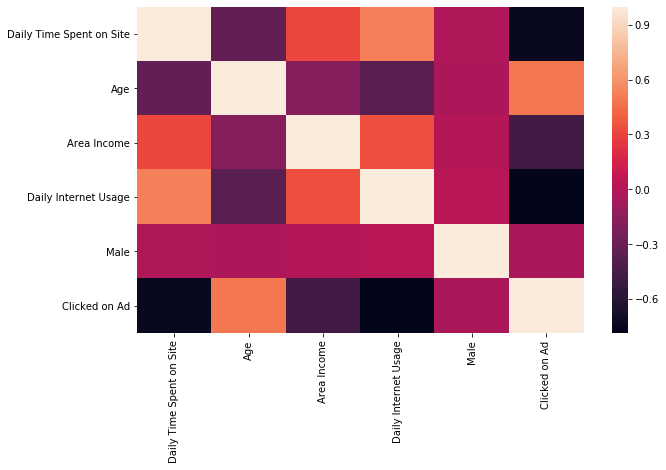

In [76]:
# Cross-correlation between the different features
crossCorrelation(Advertising_Data)

The cross-correlation revealed interesting potential relationship between our target feature and all the features except sex. There is some collinearity between explanatory variables as well

### 3.2.4 Distribution Plots With Respect To Our Target Feature

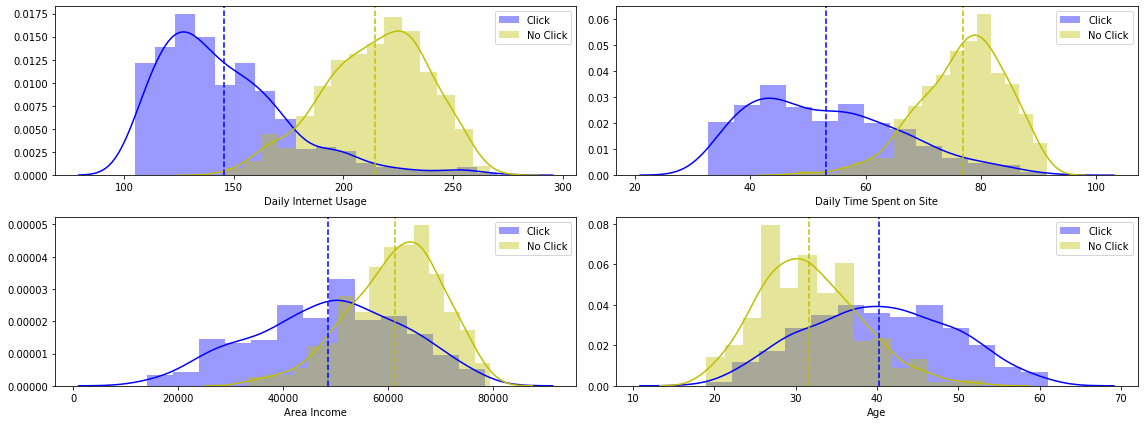

In [77]:
# Subsetting by clicks
click_yes = Advertising_Data["Clicked on Ad"] == 1
click_no = Advertising_Data["Clicked on Ad"] == 0

# Creating the plots
features = ["Daily Internet Usage", "Daily Time Spent on Site", "Area Income", "Age"]
labels = ["Click", "No Click"]

def creating_plots(features, labels):
    plt.figure(figsize=(16,6))
    for feature in features:
        plt.subplot(2, 2, features.index(feature)+1)
        sns.distplot(Advertising_Data[feature][click_yes], label=labels[0], color="b")
        sns.distplot(Advertising_Data[feature][click_no], label=labels[1], color="y")
        plt.axvline(Advertising_Data[feature][click_yes].mean(), linestyle = '--', color="b")
        plt.axvline(Advertising_Data[feature][click_no].mean(), linestyle = '--', color="y")
        plt.legend()

creating_plots(features, labels)
plt.tight_layout()

## 3.3 Feature Engineering
### 3.3.1 Skewed Features: Log Transform
Before performing machine learning, we will transform some features to avoid introducing some bias due to the overall distribution of the latter. As mentioned previously, we have some skewed distributions and they can make our models underperformed. To potentially solve this issue, we will apply a logarithmic transformation to reduce the effect of outliers and reduce the distribution's range.

From our previous EDA, we observe that "Age" was right skewed; therefore this transformation will be applied to this feature.

In [78]:
Advertising_Data["log_age"] = np.log(Advertising_Data["Age"])


In [79]:
Advertising_Data["log_age"].head()

0    3.555348
1    3.433987
2    3.258097
3    3.367296
4    3.555348
Name: log_age, dtype: float64

### 3.3.2 Removing Some Features

For the time being, we will remove some features that would need a special approach like Natural Language Processing, and time-related analysis to keep our model simple. Furthermore, we will not be considering the "City" feature because of its lack of specificity .

In [80]:
df = Advertising_Data.drop(["Ad Topic Line", "Timestamp", "City","Country"], axis=1)

In [81]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,log_age
0,68.95,35,61833.90,256.09,0,0.0,3.555348
1,80.23,31,68441.85,193.77,1,0.0,3.433987
2,69.47,26,59785.94,236.50,0,0.0,3.258097
3,74.15,29,54806.18,245.89,1,0.0,3.367296
4,68.37,35,73889.99,225.58,0,0.0,3.555348


### 3.3.3 Normalization Of Numerical Features

In [82]:
# Defining categorical, numerical, and datetime variables that we will use later
categorical_vars = ["Ad Topic Line", "City", "Country"]
numerical_vars = ["Daily Time Spent on Site", "Area Income", "Daily Internet Usage", "Male", "log_age"]
datetime_vars = "Timestamp"
target = "Clicked on Ad"



In [83]:
data[numerical_vars].head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,log_age
0,0.617882,0.730472,0.916031,0.0,0.523740
1,0.809621,0.831375,0.538746,1.0,0.419696
2,0.626721,0.699200,0.797433,0.0,0.268903
3,0.706272,0.623160,0.854280,1.0,0.362521
4,0.608023,0.914568,0.731323,0.0,0.523740


In [84]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

# Applying the MinMax transformation of the numerical variables
data = pd.DataFrame(data = df)
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

# Show an example of a record with scaling applied
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,log_age
0,0.617882,35,0.730472,0.916031,0.0,0.0,0.523740
1,0.809621,31,0.831375,0.538746,1.0,0.0,0.419696
2,0.626721,26,0.699200,0.797433,0.0,0.0,0.268903
3,0.706272,29,0.623160,0.854280,1.0,0.0,0.362521
4,0.608023,35,0.914568,0.731323,0.0,0.0,0.523740


### 3.3.4 Processing Categorical Feature: One Hot-Encoding

In [85]:
final_data = pd.get_dummies(data)

In [86]:
final_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,log_age
0,0.617882,35,0.730472,0.916031,0.0,0.0,0.523740
1,0.809621,31,0.831375,0.538746,1.0,0.0,0.419696
2,0.626721,26,0.699200,0.797433,0.0,0.0,0.268903
3,0.706272,29,0.623160,0.854280,1.0,0.0,0.362521
4,0.608023,35,0.914568,0.731323,0.0,0.0,0.523740


# 4. Model Selection

In this section, we will test various algorithms with our problem at hand to choose the best one in order to tune the model to its best parameters. In order to assess the different algorithms, we will use two metrics:

    - F1-Score
    
    - Time
    

## 4.1 Data Preparation: Training and Testing Sets

In [87]:
# Creating training and test set 
X, y = final_data.drop([target, "Age"],1).values, final_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)

In [93]:
final_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,log_age
0,0.617882,35,0.730472,0.916031,0.0,0.0,0.523740
1,0.809621,31,0.831375,0.538746,1.0,0.0,0.419696
2,0.626721,26,0.699200,0.797433,0.0,0.0,0.268903
3,0.706272,29,0.623160,0.854280,1.0,0.0,0.362521
4,0.608023,35,0.914568,0.731323,0.0,0.0,0.523740


In [88]:
# Just as a sanity check
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(800, 5)
(800,)
(201, 5)
(201,)


In [ ]:
new_test_point_normalised = scaler.transform(new_test_point)

In [97]:
X_train

array([[0.59425463, 0.73787043, 0.12513622, 0.        , 0.41969615],
       [0.76831549, 0.45370517, 0.29156072, 0.        , 0.94185479],
       [0.66802652, 0.72123509, 0.21413004, 1.        , 0.89550225],
       ...,
       [0.91670916, 0.49632698, 0.77842354, 0.        , 0.75803839],
       [0.40438552, 0.27876552, 0.29937038, 0.        , 0.95676496],
       [0.83307836, 0.74320161, 0.75057513, 0.        , 0.47329567]])

### 4.2.1 Logistic Regression

First, we will perform a general gridsearch on the penalizing parameter of the L2-Regularization. We will use this search as a guideline for a more focus search in the next step.

In [89]:
from sklearn.linear_model import LogisticRegression


parameters = {"C": [0.001, 0.01, 0.1, 1, 10 , 100, 1000]}

model = LogisticRegression(random_state=42, penalty="l2")

# fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Grid Search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
best_predictions = best_clf.predict(X_test)

# Report the scores
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)


Optimized Model
------
Final accuracy score on the testing data: 0.9403
Final F-score on the testing data: 0.9563
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [90]:
from sklearn.linear_model import LogisticRegression


parameters = {"C": [5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8, 7, 9, 9.5, 10 , 10.5, 11]}

model = LogisticRegression(random_state=42, penalty="l2")

# fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Grid Search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
best_predictions = best_clf.predict(X_train)

# Report the scores
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_train, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_train, best_predictions, beta = 0.5)))
print(best_clf)


Optimized Model
------
Final accuracy score on the testing data: 0.9762
Final F-score on the testing data: 0.9827
LogisticRegression(C=5.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


From the logisitic regression, with a model including most of our features, our best result on the training set are:

   **1. Accuracy of 99%**

   **2. F-score of 99.29%**
    
with L2-Regularization with C=5.2.

Let's look at other metrics such as the precision and recall

In [94]:
best_clf

LogisticRegression(C=5.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(best_clf, pickle_out)
pickle_out.close()